In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


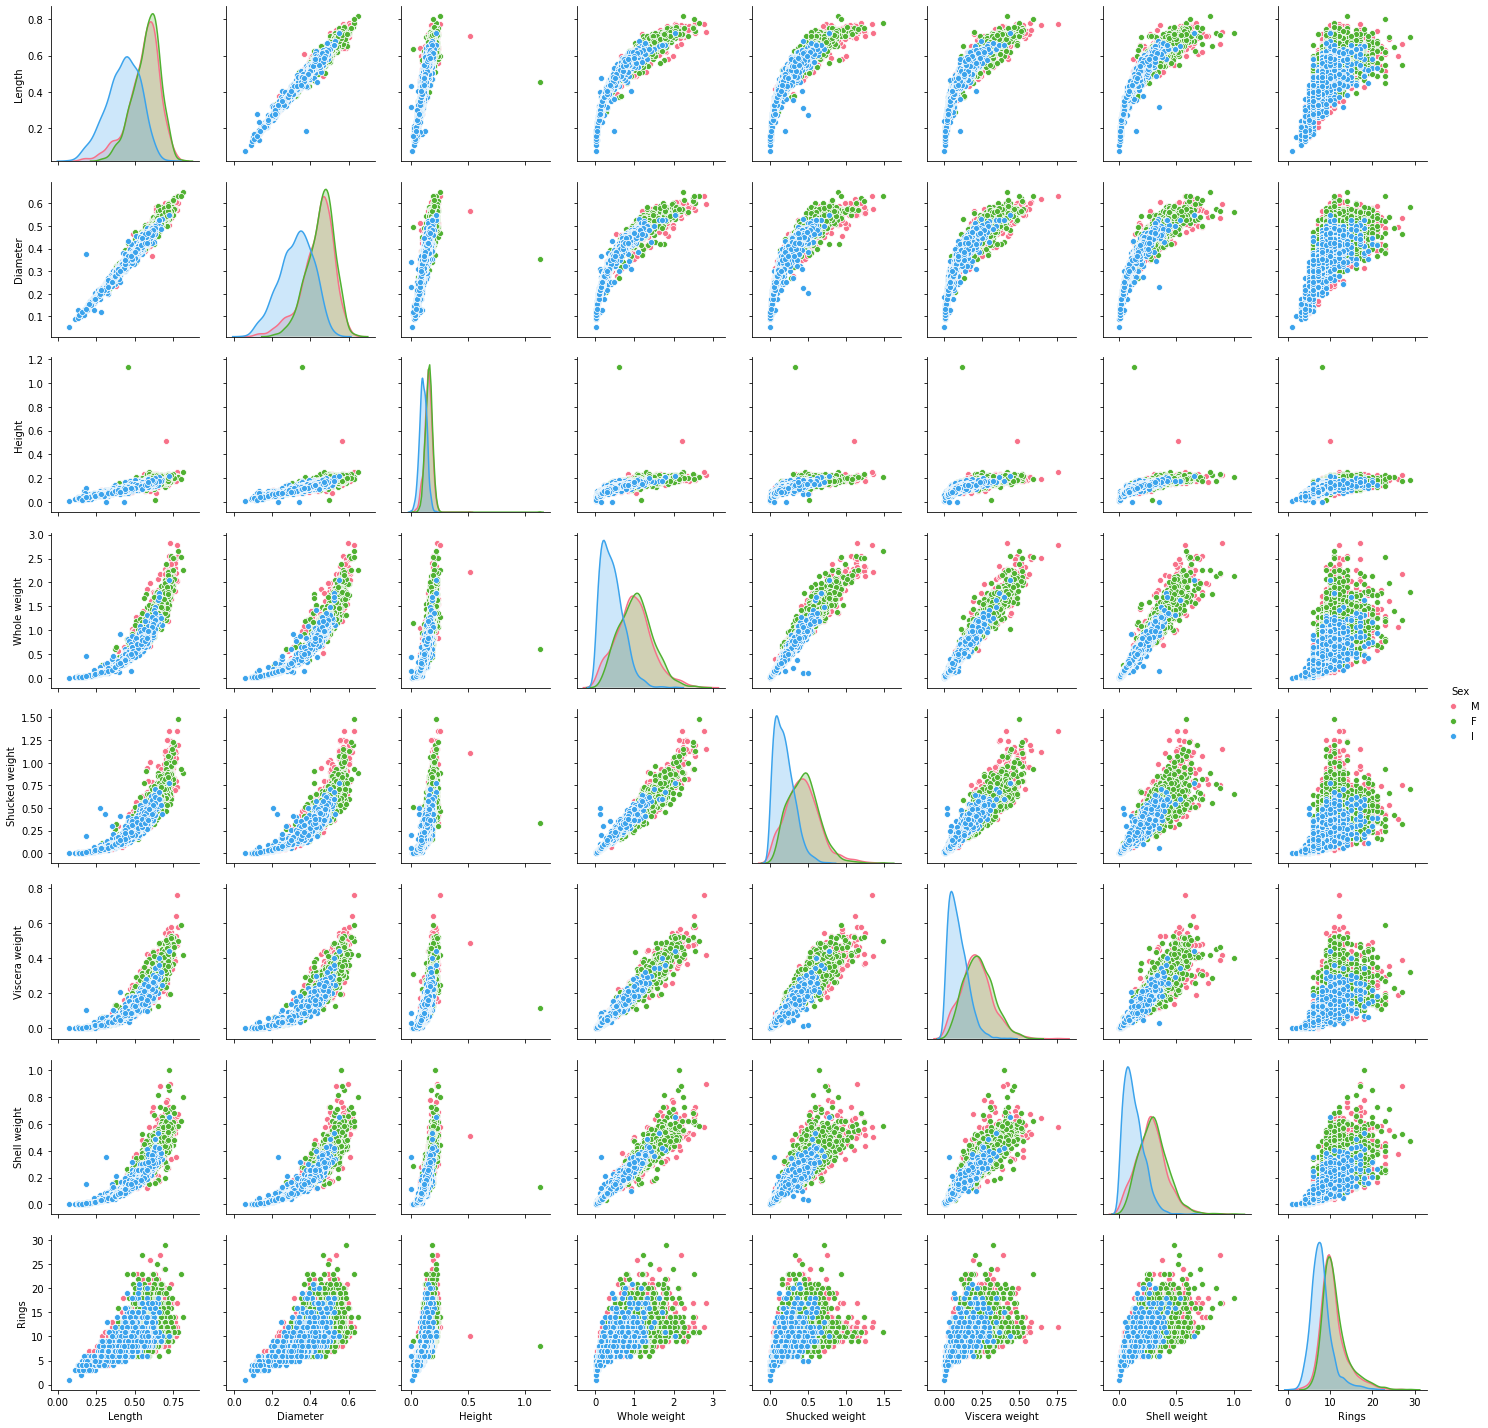

In [6]:
sns.pairplot(df, hue='Sex', palette='husl')

## Show Distribution of Data

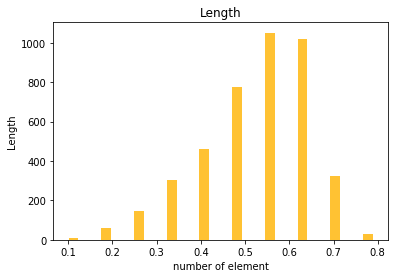

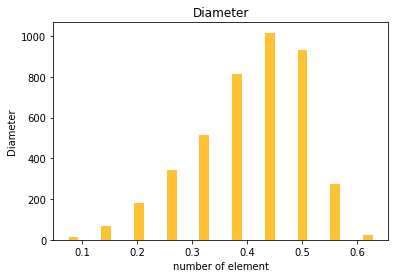

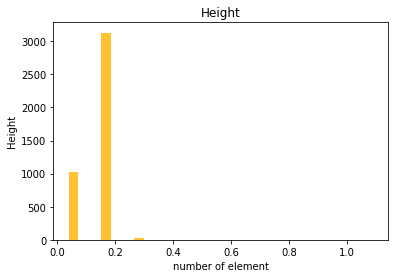

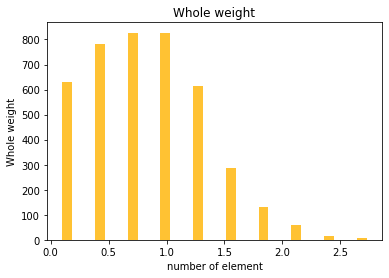

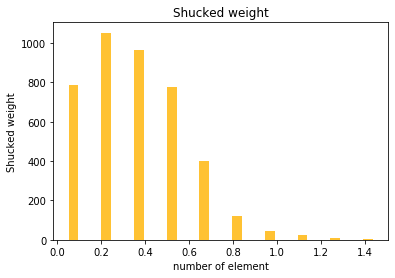

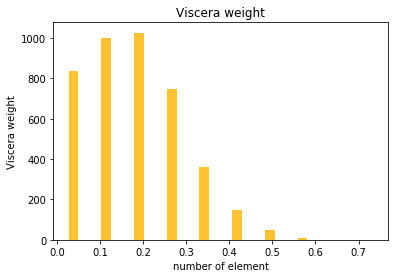

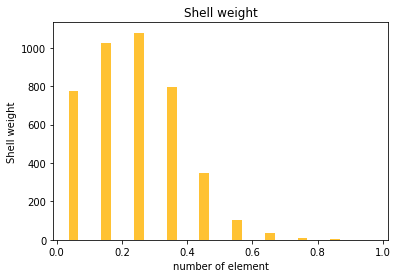

In [31]:
def plotHist(df, feature):
    fig, ax = plt.subplots()
    ax.hist(df[feature], rwidth=0.3, color=(1, 0.7, 0.0, 0.8))
    ax.set(xlabel='number of element', ylabel=feature,
           title=feature)

    plt.show()

columns = ['Length','Diameter','Height','Whole weight',
           'Shucked weight','Viscera weight','Shell weight']

for col in columns:
    plotHist(df, col)



## Preprocessing: Normalize data

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

In [68]:
X_tr[0, :3]

array([0., 1., 0.])

In [70]:
scaler = StandardScaler()
scaler.fit(X[:,3:])

X_tr_s = scaler.transform(X_tr[:,3:])
X_te_s = scaler.transform(X_te[:,3:])

In [71]:
X_tr_s = np.concatenate((X_tr[:,:3], X_tr_s), axis=1)
X_te_s = np.concatenate((X_te[:,:3], X_te_s), axis=1)

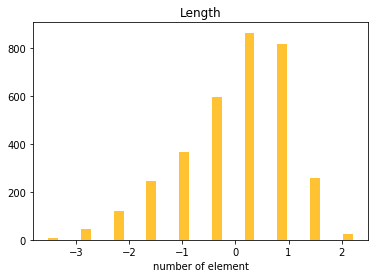

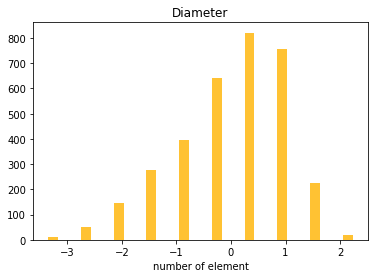

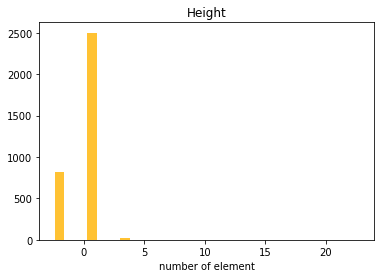

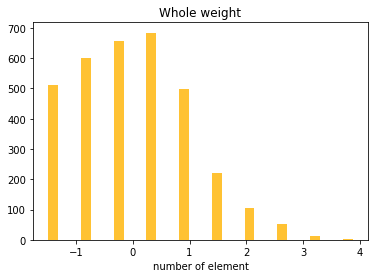

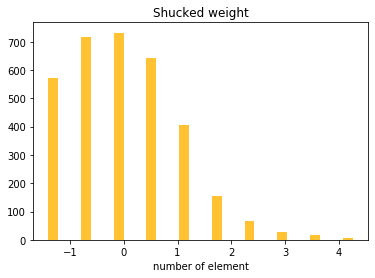

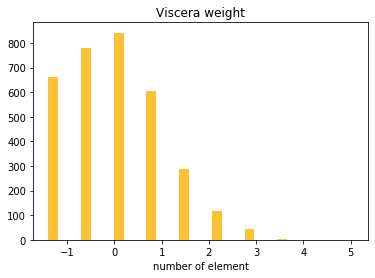

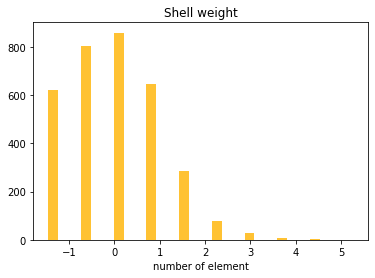

In [74]:
columns = ['Length','Diameter','Height','Whole weight',
           'Shucked weight','Viscera weight','Shell weight']

for i in range(len(X_tr_s[0][3:])):
    fig, ax = plt.subplots()
    ax.hist(X_tr_s[:,i+3], rwidth=0.3, color=(1, 0.7, 0.0, 0.8))
    ax.set(xlabel='number of element', title=columns[i])
    plt.show()

## Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [86]:
linreg = LinearRegression()
linreg.fit(X_tr_s[:,[3,4,6]], y_tr)
y_pred = linreg.predict(X_te_s[:,[3,4,6]])

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
mean_squared_error(y_te, y_pred)

7.521580217830824

In [89]:
r2_score(y_te, y_pred)

0.329726403088769